#New Face Expression Detection


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.callbacks import ModelCheckpoint
# from keras import backend as K
from tensorflow.keras import backend as K

from sklearn.model_selection import train_test_split

# Set paths and read dataset
file_path = 'fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names = ['emotion', 'pixels', 'usage']
df = pd.read_csv(file_path, names=names, na_filter=False)
df = df[1:]  # Remove the header row from the data
df.head()

# Preprocess the data
def getData(file_path):
    Y, X = [], []
    first = True
    for line in open(file_path):
        if first:
            first = False
            continue
        row = line.split(',')
        Y.append(int(row[0]))
        X.append([int(p) for p in row[1].split()])
    X = np.array(X) / 255.0  # Normalize
    Y = np.array(Y)
    return X, Y

X, Y = getData(file_path)
X = X.reshape(-1, 48, 48, 1)  # reshape for CNN
num_classes = len(set(Y))

# One-hot encoding
y_onehot = (np.arange(num_classes) == Y[:, None]).astype(np.float32)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.1, random_state=10)

# Define the CNN model
def my_model():
    model = Sequential()
    input_shape = (48, 48, 1)

    model.add(Conv2D(64, (5, 5), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
    model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Prepare model and training
model = my_model()
model.summary()

# Save model after each epoch
model_save_path = 'model_filter.h5'
checkpoint = ModelCheckpoint(filepath=model_save_path, save_best_only=True)

# Clear session and reset optimizer learning rate
K.clear_session()
model = my_model()
model.optimizer.learning_rate.assign(0.0005)
# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=20,
    verbose=1,
    validation_data=(X_test, y_test),
    shuffle=True,
    callbacks=[checkpoint]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 48, 48, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 48, 48, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 24, 24, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 24, 24, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             903 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 7)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 2,787,015 (10.63 MB)

 Trainable params: 2,785,863 (10.63 MB)

 Non-trainable params: 1,152 (4.50 KB)

Epoch 1/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3081 - loss: 1.8111

505/505 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.3082 - loss: 1.8107 - val_accuracy: 0.3525 - val_loss: 1.6625
Epoch 2/20
504/505 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4996 - loss: 1.3074

505/505 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.4997 - loss: 1.3072 - val_accuracy: 0.5099 - val_loss: 1.2839
Epoch 3/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.5934 - loss: 1.0879 - val_accuracy: 0.4748 - val_loss: 1.3642
Epoch 4/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6569 - loss: 0.9327

505/505 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.6569 - loss: 0.9328 - val_accuracy: 0.5662 - val_loss: 1.1765
Epoch 5/20
504/505 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7109 - loss: 0.8000

505/505 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.7108 - loss: 0.8001 - val_accuracy: 0.5910 - val_loss: 1.1114
Epoch 6/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.7782 - loss: 0.6355 - val_accuracy: 0.5692 - val_loss: 1.2666
Epoch 7/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.8463 - loss: 0.4557 - val_accuracy: 0.5832 - val_loss: 1.2462
Epoch 8/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9028 - loss: 0.3083 - val_accuracy: 0.6018 - val_loss: 1.4178
Epoch 9/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.9387 - loss: 0.1959 - val_accuracy: 0.6013 - val_loss: 1.4967
Epoch 10/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.9539 - loss: 0.1511 - val_accuracy: 0.5765 - val_loss: 1.6756
Epoch 11/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9595 - loss: 0.1303 - val_accuracy: 0.5723 - val_loss: 1.9225
Epoch 12/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.9650 - loss: 0.1116 - val_accu

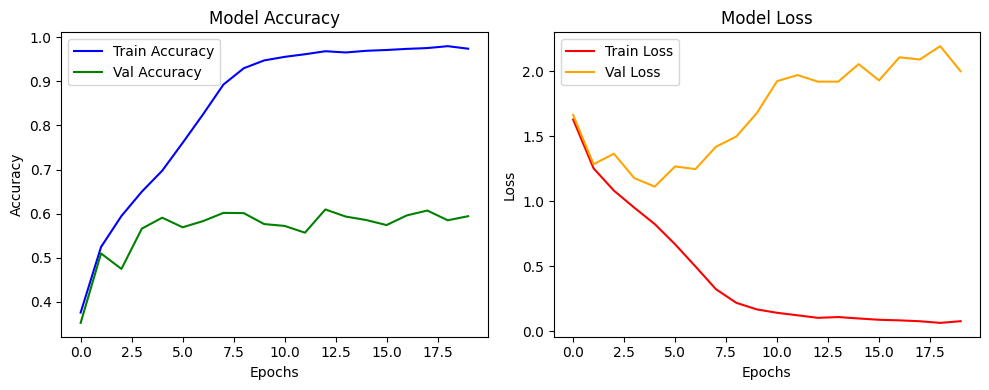

113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5972 - loss: 1.9749

Test Accuracy: 59.43%
Test Loss: 1.9988


In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='green')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()




# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
Classification Report:

              precision    recall  f1-score   support

       Anger       0.53      0.41      0.46       522
     Disgust       0.65      0.50      0.57        52
        Fear       0.46      0.41      0.44       525
       Happy       0.79      0.81      0.80       867
         Sad       0.51      0.41      0.45       613
    Surprise       0.75      0.74      0.75       399
     Neutral       0.47      0.70      0.57       611

    accuracy                           0.59      3589
   macro avg       0.60      0.57      0.58      3589
weighted avg       0.60      0.59      0.59      3589



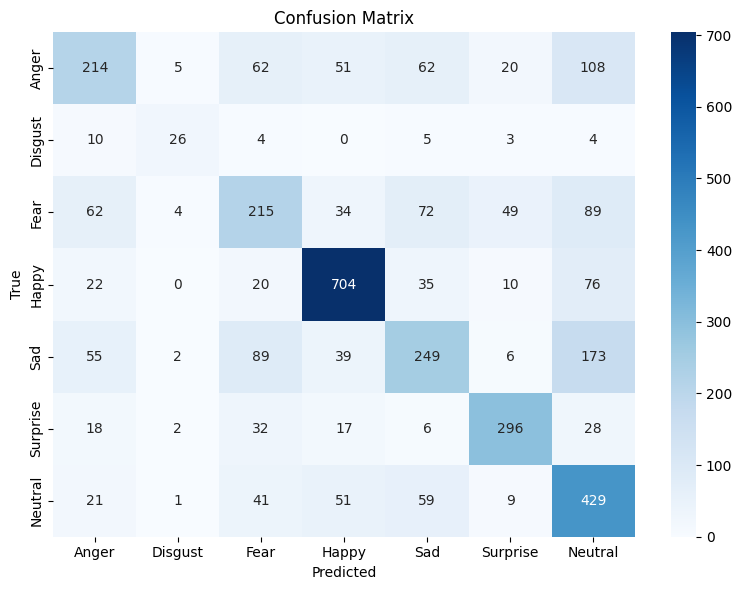

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Predict class probabilities
y_pred_probs = model.predict(X_test)

# Convert from one-hot to label
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=label_map))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_map,
            yticklabels=label_map)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


#For Real Time Detection


In [ ]:
pip install opencv-python-headless tensorflow


In [ ]:
import streamlit as st
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model and Haar cascade
model = load_model("model_filter.h5")
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
emotion_labels = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Streamlit UI setup
st.set_page_config(page_title="Webcam Emotion Detection", layout="centered")
st.title("🎥 Real-time Facial Emotion Detection")

run = st.checkbox("Start Webcam")
FRAME_WINDOW = st.image([])
camera = cv2.VideoCapture(0)

while run:
    ret, frame = camera.read()
    if not ret:
        st.error("Failed to access webcam.")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi = gray[y:y + h, x:x + w]
        roi_resized = cv2.resize(roi, (48, 48))
        roi_normalized = roi_resized.reshape(1, 48, 48, 1) / 255.0

        prediction = model.predict(roi_normalized)
        emotion = emotion_labels[np.argmax(prediction)]

        # Draw bounding box and label
        label_pos = (x, y - 10 if y - 10 > 10 else y + 20)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(frame, emotion, label_pos,
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Show the frame in Streamlit
    FRAME_WINDOW.image(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

camera.release()
cv2.destroyAllWindows()


Download Model



In [ ]:
from google.colab import files
files.download("model_filter.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Streamlit

In [ ]:
pip install streamlit opencv-python tensorflow numpy pillow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.4 MB/s eta 0:00:00


In [ ]:
# import streamlit as st
# import cv2
# import numpy as np
# from tensorflow.keras.models import load_model
# from PIL import Image
# import tempfile
# import os

# # Load model and face cascade
# model = load_model("model_filter.h5")
# face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
# emotion_labels = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# st.title("Real-time Facial Emotion Detection 😄")

# # Upload image or use webcam
# option = st.sidebar.radio("Choose input source", ('Webcam', 'Upload Image'))

# if option == 'Webcam':
#     run = st.checkbox('Start Webcam')

#     FRAME_WINDOW = st.image([])
#     camera = cv2.VideoCapture(0)

#     while run:
#         _, frame = camera.read()
#         gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#         faces = face_cascade.detectMultiScale(gray, 1.3, 5)

#         for (x, y, w, h) in faces:
#             roi = gray[y:y + h, x:x + w]
#             roi_resized = cv2.resize(roi, (48, 48)).reshape(1, 48, 48, 1) / 255.0
#             prediction = model.predict(roi_resized)
#             emotion = emotion_labels[np.argmax(prediction)]

#             cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
#             cv2.putText(frame, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

#         FRAME_WINDOW.image(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# elif option == 'Upload Image':
#     img_file = st.file_uploader("Upload an image", type=["jpg", "jpeg", "png"])
#     if img_file:
#         image = Image.open(img_file).convert('RGB')
#         img_array = np.array(image)
#         gray = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
#         faces = face_cascade.detectMultiScale(gray, 1.3, 5)

#         for (x, y, w, h) in faces:
#             roi = gray[y:y + h, x:x + w]
#             roi_resized = cv2.resize(roi, (48, 48)).reshape(1, 48, 48, 1) / 255.0
#             prediction = model.predict(roi_resized)
#             emotion = emotion_labels[np.argmax(prediction)]

#             cv2.rectangle(img_array, (x, y), (x + w, y + h), (255, 0, 0), 2)
#             cv2.putText(img_array, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

#             st.image(image, use_container_width=True)


2025-04-09 06:08:35.672 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 06:08:35.673 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 06:08:35.675 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 06:08:35.676 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 06:08:35.677 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 06:08:35.678 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 06:08:35.679 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 06:08:35.680 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
!streamlit run app.py





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.178.209:8501

